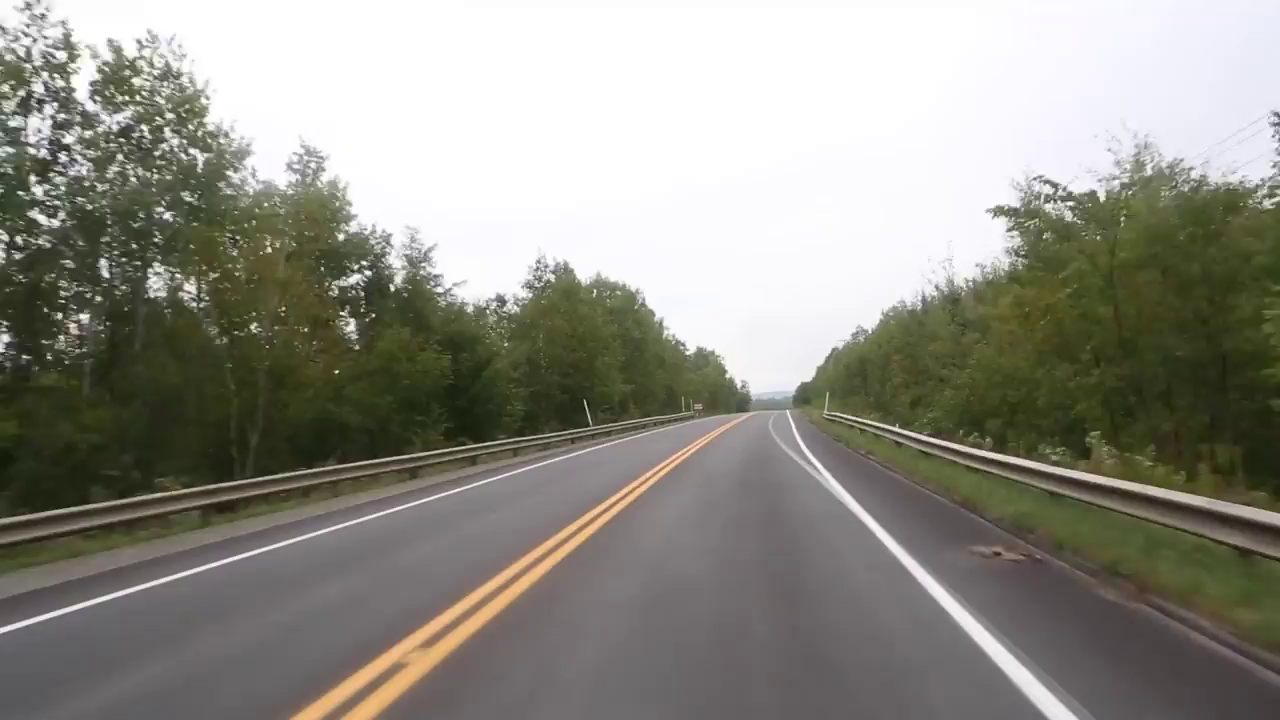

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
cap=cv2.VideoCapture('/content/test1.mp4')
ret,frame=cap.read()
cv2_imshow(frame)


In [ ]:
# Canny edge detection
def canny(img):
  gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  # We blur the image because if it is very shap it will detect the unnecesarry edges
  kernel=5
  blur=cv2.GaussianBlur(gray,(kernel,kernel),0)
  canny=cv2.Canny(blur,50,150)
  return canny


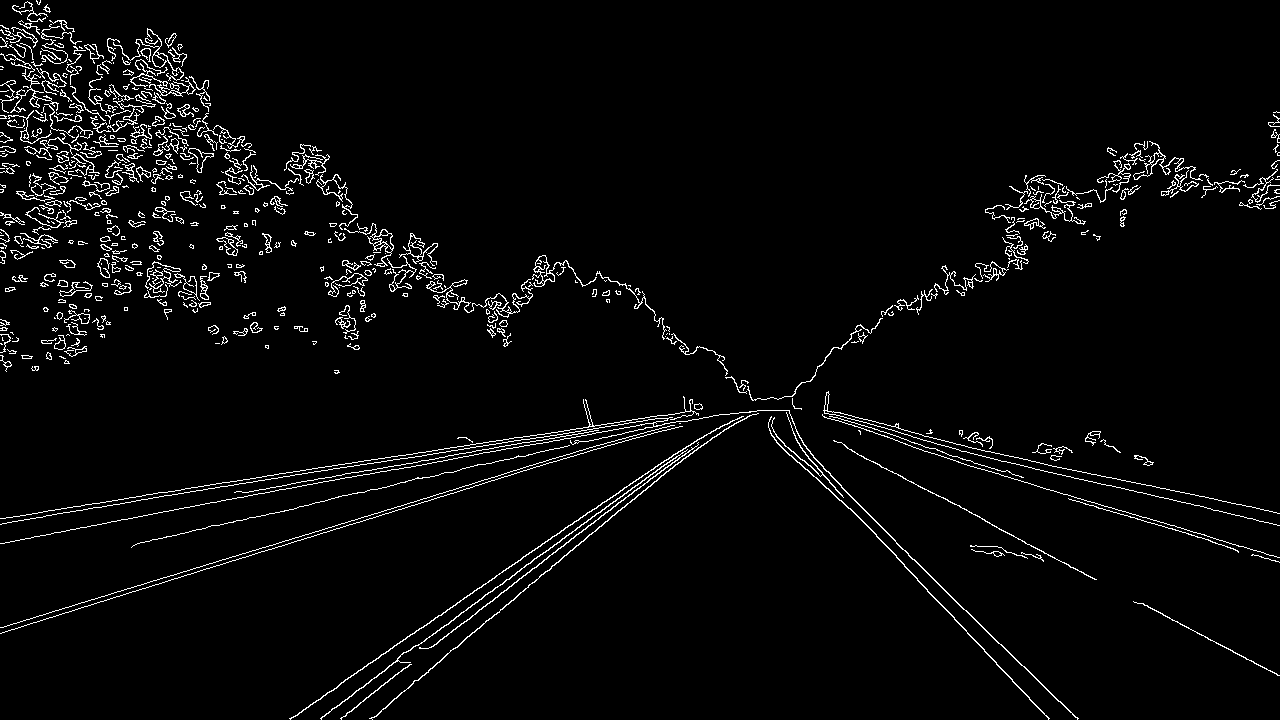

In [ ]:
canny_out=canny(frame)
cv2_imshow(canny_out)

In [ ]:
import numpy as np
def roi(img): # input is the canny output
  height=img.shape[0]
  width=img.shape[1]
  mask=np.zeros_like(img)
  triangle=np.array([[(200,height),(800,350),(1200,height)]],np.int32)
  cv2.fillPoly(mask,triangle,255)
  masked_img=cv2.bitwise_and(img,mask)
  return masked_img


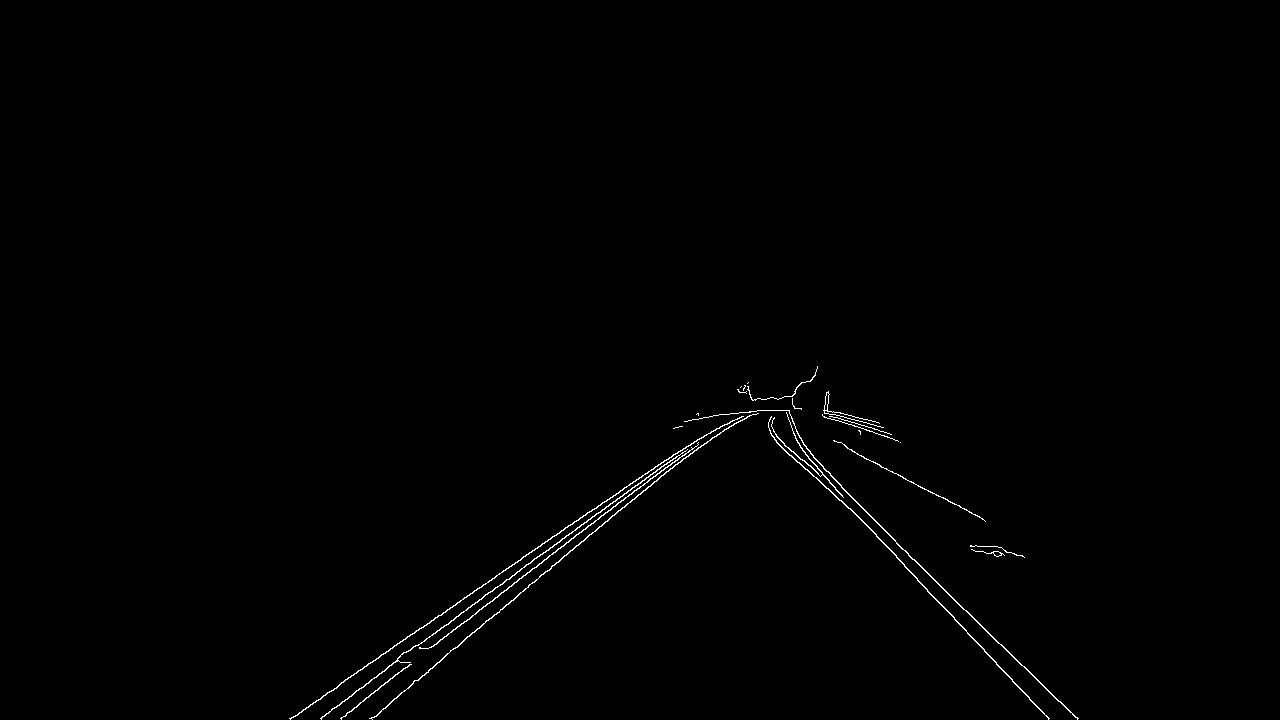

In [ ]:
interest_region=roi(canny_out)
cv2_imshow(interest_region)

In [ ]:
# Use hough transform to clear the remaining noise and detect the lines
# Hough transform reads through the pixels and tries to detect the shape formed by those pixels
def houghlines(img): # input is the interest_region
  houghLines=cv2.HoughLinesP(img,2,np.pi/180,100,np.array([]),minLineLength=80,maxLineGap=5)
  return houghLines

In [ ]:
lines=houghlines(interest_region)
# Draw the lines
def display_lines(img,lines):
  #line_image=np.zeros_like(img)
  if lines is not None:
    for line in lines:
      x1,y1,x2,y2=line.reshape(4)
      cv2.line(img,(x1,y1),(x2,y2),(255,0,0),10)
  return img    

In [ ]:
line_image=display_lines(frame,lines)

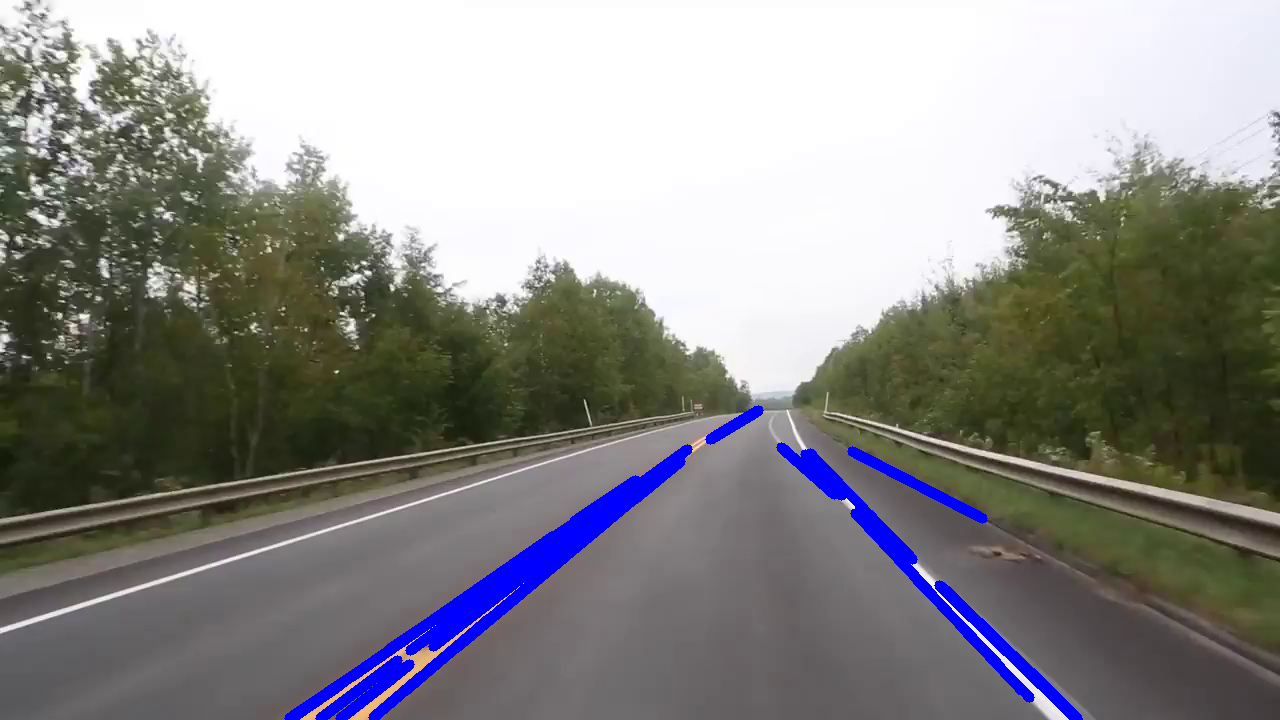

In [ ]:
cv2_imshow(line_image)

In [ ]:
def points(img,lineSI):
  slope,intercept=lineSI
  height=img.shape[0]
  y1=int(height)
  y2=int(y1*0.6)
  x1=int((y1-intercept)/slope)
  x2=int((y2-intercept)/slope)
  return[[x1,y1,x2,y2]]

def average_slope_intercept(img,lines):
  left_line=[]
  right_line=[]
  for line in lines:
    for x1,y1,x2,y2 in line:
      fit=np.polyfit((x1,x2),(y1,y2),1)
      slope=fit[0]
      intercept=fit[1]
      if slope<0:
        left_line.append((slope,intercept))
      else:
        right_line.append((slope,intercept))
  left_avg=np.average(left_line,axis=0)
  right_avg=np.average(right_line,axis=0)
  left=points(img,left_avg)
  right=points(img,right_avg)
  avg_lines=[left,right]
  return avg_lines

def display_lines_avg(img,lines):
  #line_image=np.zeros_like(img)
  if lines is not None:
    for line in lines:
      for x1,y1,x2,y2 in line:
       cv2.line(img,(x1,y1),(x2,y2),(255,0,0),10)
  return img    


In [ ]:
avg_lines=average_slope_intercept(frame,lines)
line_image1=display_lines_avg(frame,avg_lines)

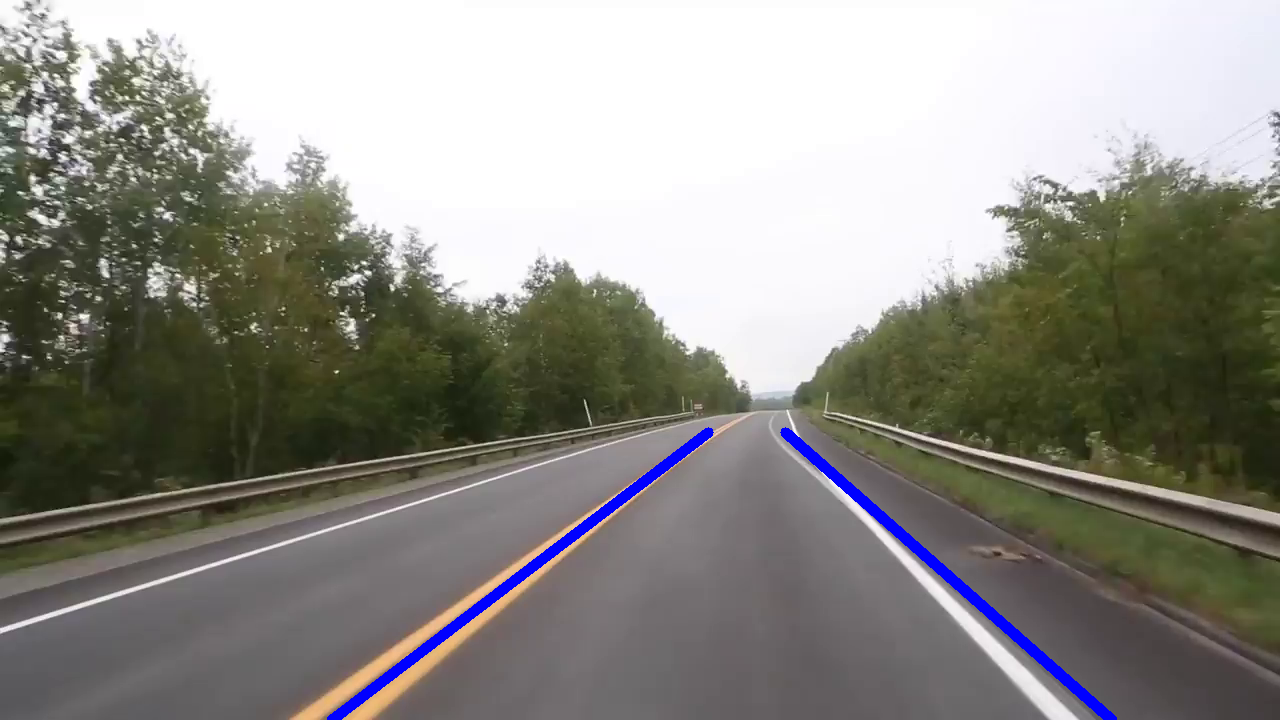

In [ ]:
cv2_imshow(line_image1)